# my example

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import widgets

## Modelo exponencial:

\begin{equation*}
\frac{dx}{dt} = x
\end{equation*}

## Solução dessa equação:

\begin{equation*}
x(t) = C e^{t/r}
\end{equation*}


crescimento exponencial

## mas e se a taxa temporal depender do proprio valor de x? 

Modelo:

taxa de investimento constante + uma redução dependente do retorno

\begin{equation*}
f_r(x_n) = r-1 -rx_{n}
\end{equation*}

mudando para solucao numerica temos:

\begin{equation*}
\frac{x_{n+1} -x_{n}}{{f_r}(x_n)} = x
\end{equation*}

solucao:

\begin{equation*}
x_{n+1} = rx_{n}(1-x_{n})
\end{equation*}

Soluções simples possíveis

In [2]:
def temporal_evolution(r,i_number,xo):
    """returns a array with the iteration numbers"""
    x = xo
    f=0
    for _ in range(i_number):
        x = r*x*(1-x)
    f = x
    return f

## Baixo investimento

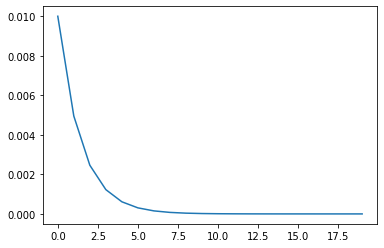

In [3]:
time = np.arange(20)
r=0.5
xo=0.01
yy = [temporal_evolution(r,i,xo) for i in time]
plt.plot(yy)

## investimento nao suficiente

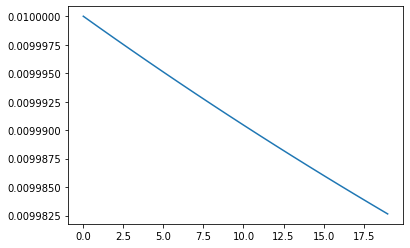

In [4]:
time = np.arange(20)
r=1.01
xo=0.01
yy = [temporal_evolution(r,i,xo) for i in time]
plt.plot(yy)

## Investimento mínimo para estabilização 

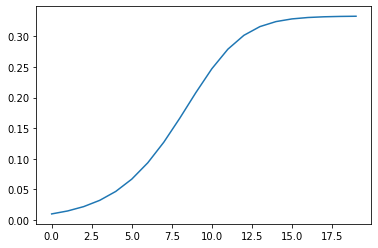

In [5]:
time = np.arange(20)
r=1.5
xo=0.01
yy = [temporal_evolution(r,i,xo) for i in time]
plt.plot(yy)

## Muito investimento de alto oscilação

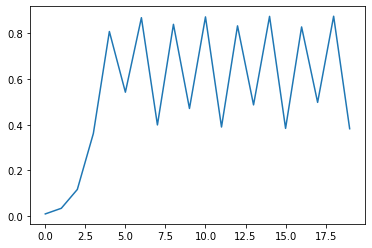

In [6]:
time = np.arange(20)
r=3.5
xo=0.01
yy = [temporal_evolution(r,i,xo) for i in time]
plt.plot(yy)

## Muito investiemnto alto risco

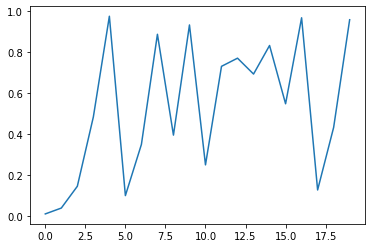

In [7]:
time = np.arange(20)
r=3.9
xo=0.01
yy = [temporal_evolution(r,i,xo) for i in time]
plt.plot(yy)

In [16]:
#grafic definition

def logistic_map(r,x=0.1):
    for i in range(1000):
        x = r*x*(1-x)
    return x

fig = go.FigureWidget()
fig.update_xaxes(range=[0.0, 5.0])
fig.layout.xaxis.title = '$r_{values}$'
fig.layout.yaxis.title = '$x_{final}$'
#for val in [0.1,0.5]:
val=0.01
xx_base = np.arange(1000,4001)*0.001
yy_base = logistic_map(xx_base,x=val)
fig.add_trace(go.Scatter(x=xx_base[:1], y=yy_base[:1],
                         mode='markers',marker_size=3))

xx_base = np.arange(0,4001)*0.001
yy_base = logistic_map(xx_base,x=val)
#simple_graphic.add_trace(px.scatter(x=xx_base, y=yy_base))

#slider button definition
value_slider = widgets.IntSlider(
    value = 1.0,
    min=1.0,
    max=4000.0,
    step=1,
    description='N$_r$ value',
    continuous_update=True
)

# response for slider button
def response(change):
    dot_points = value_slider.value
    with fig.batch_update():
        fig.data[0].x = xx_base[:dot_points]
        fig.data[0].y = yy_base[:dot_points]
# simple_graphic_a.data[1].x = xx_base_b[:dot_points]
        fig.update()

# add the response action
value_slider.observe(response, names="value")

# put the things in container
container = widgets.VBox(children=[value_slider,fig])

#show the widgets
widgets.HBox([container])

 …

In [17]:
#grafic definition
def logistic_map(r,x=0.1):
    for i in range(1000):
        x = r*x*(1-x)
    return x

fig = go.FigureWidget()
fig.update_xaxes(range=[0.0, 5.0])
fig.layout.xaxis.title = '$r_{values}$'
fig.layout.yaxis.title = '$x_{final}$'

xx_base=[]
yy_base=[]
for val in [0.1,0.2,0.3,0.4,0.5]:
    xx_base = np.arange(1000,4001)*0.001
    yy_base = logistic_map(np.arange(1000,4001)*0.001,x=val)
    fig.add_trace(go.Scatter(x=xx_base, y=yy_base,
                             mode='markers',marker_size=3))

#simple_graphic.add_trace(px.scatter(x=xx_base, y=yy_base))
#slider button definition
value_slider = widgets.IntSlider(
    value = 1.0,
    min=1.0,
    max=4000.0,
    step=1,
    description='N$_r$ value',
    continuous_update=True
)
container = widgets.VBox(children=[fig])

#show the widgets
widgets.HBox([container])

    'data': [{'marker': {'size': 3},
              'mode': 'marke…